Plot EF-SM model parameters: wilting and critical points, dEF/dSM, time in transitional regime
--

In [2]:
import sys
import os
import argparse
import numpy as np
import pandas as pd
import xarray as xr
import itertools
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from read_data import *
from p_config import regions

In [3]:
season='winter'
driving='GAL9'
res_glo = 'n1280'
phy_glo = 'GAL9'
res_cha='km4p4'
res_lam='km2p2'
region='africa'
physics='RAL3'
depth=0  # soil layer [0, 3]

year = 2020
dates = {2: np.arange(1, 28+1, 1)}   # 1: np.arange(20, 30+1, 1)

lat_range = regions[region][0]
lon_range = regions[region][1]

lat_range = (-15., 5.)
lon_range = (-10., 40.)

lat_min = lat_range[0]
lat_max = lat_range[1]
lon_min = lon_range[0]
lon_max = lon_range[1]

proj = ccrs.PlateCarree()

xtcks = np.arange(lon_range[0], lon_range[1]+10, 10)
ytcks = np.arange(lat_range[0], lat_range[1]+10, 10)

In [4]:
#~ Get data

nums_glo = load_sm_ef_model_number_glo(season, driving, res_glo, phy_glo, (lat_min, lat_max), (lon_min, lon_max), depth)
nums_cha = load_sm_ef_model_number_channel(season, driving, res_cha, physics, (lat_min, lat_max), (lon_min, lon_max), depth)
nums_lam = load_sm_ef_model_number_lam(season, driving, region, res_lam, physics, (lat_min, lat_max), (lon_min, lon_max), depth)

wilt_glo = load_wilting_point_glo(season, driving, res_glo, phy_glo, (lat_min, lat_max), (lon_min, lon_max), depth)
wilt_cha = load_wilting_point_channel(season, driving, res_cha, physics, (lat_min, lat_max), (lon_min, lon_max), depth)
wilt_lam = load_wilting_point_lam(season, driving, region, res_lam, physics, (lat_min, lat_max), (lon_min, lon_max), depth)

crit_glo = load_critical_point_glo(season, driving, res_glo, phy_glo, (lat_min, lat_max), (lon_min, lon_max), depth)
crit_cha = load_critical_point_channel(season, driving, res_cha, physics, (lat_min, lat_max), (lon_min, lon_max), depth)
crit_lam = load_critical_point_lam(season, driving, region, res_lam, physics, (lat_min, lat_max), (lon_min, lon_max), depth)

time_glo = load_time_glo(season, driving, res_glo, phy_glo, (lat_min, lat_max), (lon_min, lon_max), depth)
time_cha = load_time_channel(season, driving, res_cha, physics, (lat_min, lat_max), (lon_min, lon_max), depth)
time_lam = load_time_lam(season, driving, region, res_lam, physics, (lat_min, lat_max), (lon_min, lon_max), depth)

In [5]:
#~ Compute each model's proportion

all_nums_glo = nums_glo.values[~np.isnan(nums_glo.values)]
ntot = len(all_nums_glo)

flat_glo = nums_glo.where(nums_glo == 0)
flat_frac_glo = len(flat_glo.values[~np.isnan(flat_glo.values)]) / ntot * 100
lr_glo = nums_glo.where(nums_glo == 1)
lr_frac_glo = len(lr_glo.values[~np.isnan(lr_glo.values)]) / ntot * 100
dt_glo = nums_glo.where(nums_glo == 2)
dt_frac_glo = len(dt_glo.values[~np.isnan(dt_glo.values)]) / ntot * 100
tw_glo = nums_glo.where(nums_glo == 3)
tw_frac_glo = len(tw_glo.values[~np.isnan(tw_glo.values)]) / ntot * 100
dtw_glo = nums_glo.where(nums_glo == 4)
dtw_frac_glo = len(dtw_glo.values[~np.isnan(dtw_glo.values)]) / ntot * 100
sum_frac_glo = np.sum([flat_frac_glo, lr_frac_glo, dt_frac_glo, tw_frac_glo, dtw_frac_glo])
#assert sum_frac == 100.
(flat_frac_glo, lr_frac_glo, dt_frac_glo, tw_frac_glo, dtw_frac_glo, sum_frac_glo)

all_nums_cha = nums_cha.values[~np.isnan(nums_cha.values)]
ntot_cha = len(all_nums_cha)

flat_cha = nums_cha.where(nums_cha == 0)
flat_frac_cha = len(flat_cha.values[~np.isnan(flat_cha.values)]) / ntot_cha * 100
lr_cha = nums_cha.where(nums_cha == 1)
lr_frac_cha = len(lr_cha.values[~np.isnan(lr_cha.values)]) / ntot_cha * 100
dt_cha = nums_cha.where(nums_cha == 2)
dt_frac_cha = len(dt_cha.values[~np.isnan(dt_cha.values)]) / ntot_cha * 100
tw_cha = nums_cha.where(nums_cha == 3)
tw_frac_cha = len(tw_cha.values[~np.isnan(tw_cha.values)]) / ntot_cha * 100
dtw_cha = nums_cha.where(nums_cha == 4)
dtw_frac_cha = len(dtw_cha.values[~np.isnan(dtw_cha.values)]) / ntot_cha * 100
sum_frac_cha = np.sum([flat_frac_cha, lr_frac_cha, dt_frac_cha, tw_frac_cha, dtw_frac_cha])
#assert sum_frac == 100.
(flat_frac_cha, lr_frac_cha, dt_frac_cha, tw_frac_cha, dtw_frac_cha, sum_frac_cha)

all_nums_lam = nums_lam.values[~np.isnan(nums_lam.values)]
ntot_lam = len(all_nums_lam)

flat_lam = nums_lam.where(nums_lam == 0)
flat_frac_lam = len(flat_lam.values[~np.isnan(flat_lam.values)]) / ntot * 100
lr_lam = nums_lam.where(nums_lam == 1)
lr_frac_lam = len(lr_lam.values[~np.isnan(lr_lam.values)]) / ntot * 100
dt_lam = nums_lam.where(nums_lam == 2)
dt_frac_lam = len(dt_lam.values[~np.isnan(dt_lam.values)]) / ntot * 100
tw_lam = nums_lam.where(nums_lam == 3)
tw_frac_lam = len(tw_lam.values[~np.isnan(tw_lam.values)]) / ntot * 100
dtw_lam = nums_lam.where(nums_lam == 4)
dtw_frac_lam = len(dtw_lam.values[~np.isnan(dtw_lam.values)]) / ntot * 100
sum_frac_lam = np.sum([flat_frac_lam, lr_frac_lam, dt_frac_lam, tw_frac_lam, dtw_frac_lam])
#assert sum_frac == 100.
(flat_frac_lam, lr_frac_lam, dt_frac_lam, tw_frac_lam, dtw_frac_lam, sum_frac_lam)

(63.727447700250025,
 29.23749392909179,
 3.552605543863436,
 3.385318295468854,
 0.09713453132588634,
 99.99999999999999)

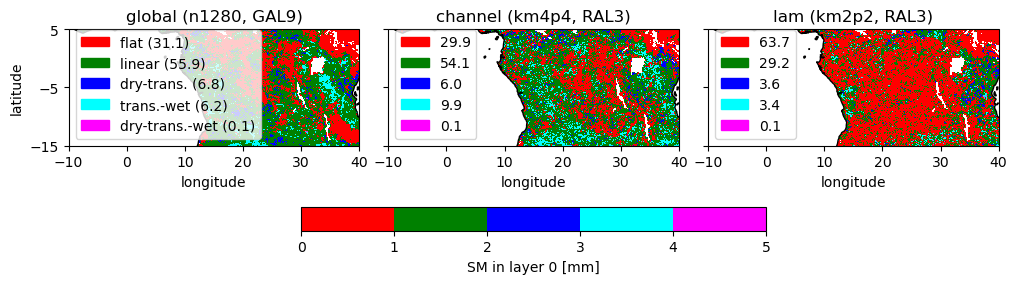

In [6]:
#~ Plot models

flat_patch_glo = mpatches.Patch(color='red', label='flat (%.1f)'%flat_frac_glo)
lr_patch_glo = mpatches.Patch(color='green', label='linear (%.1f)'%lr_frac_glo)
dt_patch_glo = mpatches.Patch(color='blue', label='dry-trans. (%.1f)'%dt_frac_glo)
tw_patch_glo = mpatches.Patch(color='cyan', label='trans.-wet (%.1f)'%tw_frac_glo)
dtw_patch_glo = mpatches.Patch(color='magenta', label='dry-trans.-wet (%.1f)'%dtw_frac_glo)

flat_patch_cha = mpatches.Patch(color='red', label='%.1f'%flat_frac_cha)
lr_patch_cha = mpatches.Patch(color='green', label='%.1f'%lr_frac_cha)
dt_patch_cha = mpatches.Patch(color='blue', label='%.1f'%dt_frac_cha)
tw_patch_cha = mpatches.Patch(color='cyan', label='%.1f'%tw_frac_cha)
dtw_patch_cha = mpatches.Patch(color='magenta', label='%.1f'%dtw_frac_cha)

flat_patch_lam = mpatches.Patch(color='red', label='%.1f'%flat_frac_lam)
lr_patch_lam = mpatches.Patch(color='green', label='%.1f'%lr_frac_lam)
dt_patch_lam = mpatches.Patch(color='blue', label='%.1f'%dt_frac_lam)
tw_patch_lam = mpatches.Patch(color='cyan', label='%.1f'%tw_frac_lam)
dtw_patch_lam = mpatches.Patch(color='magenta', label='%.1f'%dtw_frac_lam)

cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan', 'magenta'])
bounds = np.arange(0, 5+1, 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': proj})

plt.subplots_adjust(wspace=0.1, bottom=0.15, top=0.9)

nums_glo.plot(ax=ax[0], norm=norm, cmap=cmap, add_colorbar=False)
nums_cha.plot(ax=ax[1], norm=norm, cmap=cmap, add_colorbar=False)
nums_lam.plot(ax=ax[2], norm=norm, cmap=cmap, add_colorbar=False)


ax[0].legend(handles=[flat_patch_glo, lr_patch_glo, dt_patch_glo, tw_patch_glo, dtw_patch_glo], loc='lower left')
ax[1].legend(handles=[flat_patch_cha, lr_patch_cha, dt_patch_cha, tw_patch_cha, dtw_patch_cha], loc='lower left')
ax[2].legend(handles=[flat_patch_lam, lr_patch_lam, dt_patch_lam, tw_patch_lam, dtw_patch_lam], loc='lower left')

ax[0].coastlines()
ax[0].set_xticks(xtcks)
ax[0].set_yticks(ytcks)
ax[0].set_title('global (n1280, GAL9)')
ax[1].coastlines()
ax[1].set_xticks(xtcks)
ax[1].set_yticks(ytcks)
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_title('channel (%s, %s)'%(res_cha, physics))
ax[2].coastlines()
ax[2].set_xticks(xtcks)
ax[2].set_yticks(ytcks)
ax[2].set_yticklabels([])
ax[2].set_ylabel('')
ax[2].set_title('lam (%s, %s)'%(res_lam, physics))

cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[:], orientation='horizontal', label='SM in layer %i [mm]'%depth, shrink=0.5, pad=0.15)

fig.set_size_inches(12., 5.5)

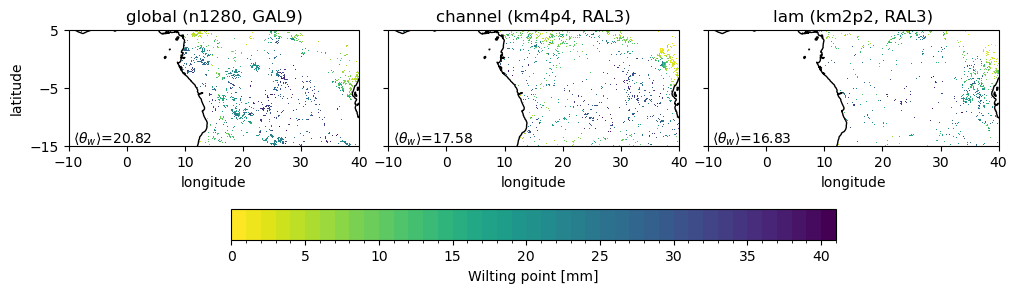

In [7]:
#~ Plot wilting point

wp_min = min(wilt_glo.min(), wilt_cha.min(), wilt_lam.min())
wp_max = min(wilt_glo.max(), wilt_cha.max(), wilt_lam.max())

cmap = plt.get_cmap('viridis_r')
bounds = np.arange(np.floor(wp_min), np.ceil(wp_max), 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': proj})

plt.subplots_adjust(wspace=0.1)

wilt_glo.plot(ax=ax[0], norm=norm, cmap=cmap, add_colorbar=False)
wilt_cha.plot(ax=ax[1], norm=norm, cmap=cmap, add_colorbar=False)
wilt_lam.plot(ax=ax[2], norm=norm, cmap=cmap, add_colorbar=False)

ax[0].text(0.015, 0.025, '$\\langle \\theta_w \\rangle$=%.2f'%wilt_glo.mean(), transform=ax[0].transAxes)
ax[1].text(0.015, 0.025, '$\\langle \\theta_w \\rangle$=%.2f'%wilt_cha.mean(), transform=ax[1].transAxes)
ax[2].text(0.015, 0.025, '$\\langle \\theta_w \\rangle$=%.2f'%wilt_lam.mean(), transform=ax[2].transAxes)

ax[0].coastlines()
ax[0].set_xticks(xtcks)
ax[0].set_yticks(ytcks)
ax[0].set_title('global (n1280, GAL9)')
ax[1].coastlines()
ax[1].set_xticks(xtcks)
ax[1].set_yticks(ytcks)
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_title('channel (%s, %s)'%(res_cha, physics))
ax[2].coastlines()
ax[2].set_xticks(xtcks)
ax[2].set_yticks(ytcks)
ax[2].set_yticklabels([])
ax[2].set_ylabel('')
ax[2].set_title('lam (%s, %s)'%(res_lam, physics))

cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[:], orientation='horizontal', label='Wilting point [mm]', shrink=0.65, pad=0.15)

fig.set_size_inches(12., 5.5)

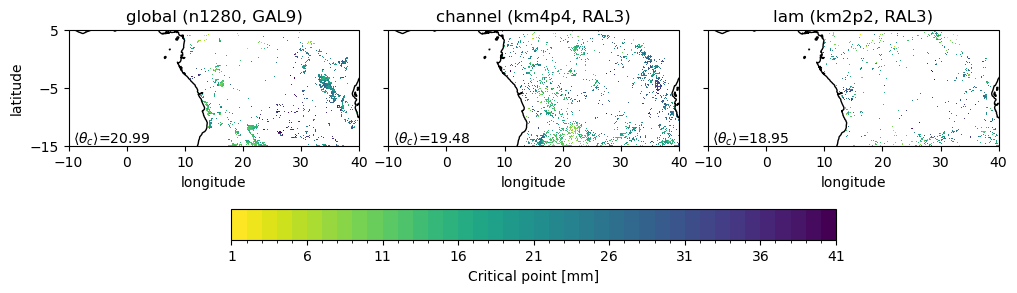

In [8]:
#~ Plot crit point

cp_min = min(crit_glo.min(), crit_cha.min(), crit_lam.min())
cp_max = min(crit_glo.max(), crit_cha.max(), crit_lam.max())

cmap = plt.get_cmap('viridis_r')
bounds = np.arange(np.floor(cp_min), np.ceil(cp_max), 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': proj})

plt.subplots_adjust(wspace=0.1)

crit_glo.plot(ax=ax[0], norm=norm, cmap=cmap, add_colorbar=False)
crit_cha.plot(ax=ax[1], norm=norm, cmap=cmap, add_colorbar=False)
crit_lam.plot(ax=ax[2], norm=norm, cmap=cmap, add_colorbar=False)

ax[0].text(0.015, 0.025, '$\\langle \\theta_c \\rangle$=%.2f'%crit_glo.mean(), transform=ax[0].transAxes)
ax[1].text(0.015, 0.025, '$\\langle \\theta_c \\rangle$=%.2f'%crit_cha.mean(), transform=ax[1].transAxes)
ax[2].text(0.015, 0.025, '$\\langle \\theta_c \\rangle$=%.2f'%crit_lam.mean(), transform=ax[2].transAxes)

ax[0].coastlines()
ax[0].set_xticks(xtcks)
ax[0].set_yticks(ytcks)
ax[0].set_title('global (n1280, GAL9)')
ax[1].coastlines()
ax[1].set_xticks(xtcks)
ax[1].set_yticks(ytcks)
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_title('channel (%s, %s)'%(res_cha, physics))
ax[2].coastlines()
ax[2].set_xticks(xtcks)
ax[2].set_yticks(ytcks)
ax[2].set_yticklabels([])
ax[2].set_ylabel('')
ax[2].set_title('lam (%s, %s)'%(res_lam, physics))

cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[:], orientation='horizontal', label='Critical point [mm]', shrink=0.65, pad=0.15)

fig.set_size_inches(12., 5.5)

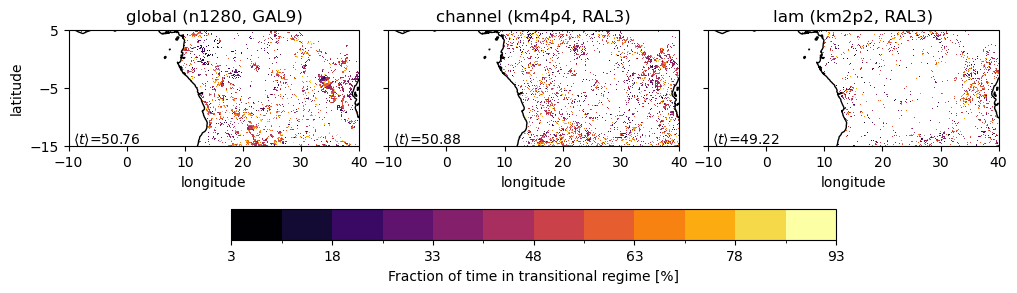

In [9]:
#~ Plot time in transitional regime

t_min = min(time_glo.min(), time_cha.min(), time_lam.min())
t_max = min(time_glo.max(), time_cha.max(), time_lam.max())

cmap = plt.get_cmap('inferno')
bounds = np.linspace(np.floor(t_min), np.ceil(t_max), 13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': proj})

plt.subplots_adjust(wspace=0.1)

time_glo.plot(ax=ax[0], norm=norm, cmap=cmap, add_colorbar=False)
time_cha.plot(ax=ax[1], norm=norm, cmap=cmap, add_colorbar=False)
time_lam.plot(ax=ax[2], norm=norm, cmap=cmap, add_colorbar=False)

ax[0].text(0.015, 0.025, '$\\langle t \\rangle$=%.2f'%time_glo.mean(), transform=ax[0].transAxes)
ax[1].text(0.015, 0.025, '$\\langle t \\rangle$=%.2f'%time_cha.mean(), transform=ax[1].transAxes)
ax[2].text(0.015, 0.025, '$\\langle t \\rangle$=%.2f'%time_lam.mean(), transform=ax[2].transAxes)

ax[0].coastlines()
ax[0].set_xticks(xtcks)
ax[0].set_yticks(ytcks)
ax[0].set_title('global (n1280, GAL9)')
ax[1].coastlines()
ax[1].set_xticks(xtcks)
ax[1].set_yticks(ytcks)
ax[1].set_yticklabels([])
ax[1].set_ylabel('')
ax[1].set_title('channel (%s, %s)'%(res_cha, physics))
ax[2].coastlines()
ax[2].set_xticks(xtcks)
ax[2].set_yticks(ytcks)
ax[2].set_yticklabels([])
ax[2].set_ylabel('')
ax[2].set_title('lam (%s, %s)'%(res_lam, physics))

cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[:], orientation='horizontal', label='Fraction of time in transitional regime [%]', shrink=0.65, pad=0.15)

fig.set_size_inches(12., 5.5)